In [4]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd

In [5]:
#Import data
data = pd.read_csv("data/background_220720.txt",dtype=np.float64)
bknd_bins = data.iloc[:,0]
bknd_cnts = data.iloc[:,1]
bknd_bins = np.asarray(bknd_bins,dtype=np.double)
bknd_cnts = np.asarray(bknd_cnts)

databoron = pd.read_csv("data/boron_220721.txt",dtype=np.float64)
boron_bins = databoron.iloc[:,0]
boron_cnts = databoron.iloc[:,1]
boron_bins = np.asarray(boron_bins,dtype=np.double)
boron_cnts = np.asarray(boron_cnts)

datatimed = pd.read_csv("data/timed_background_220722.txt",dtype=np.float64)
tbknd_bins = datatimed.iloc[:,0]
tbknd_cnts = datatimed.iloc[:,1]
tbknd_bins = np.asarray(tbknd_bins,dtype=np.double)
tbknd_cnts = np.asarray(tbknd_cnts)

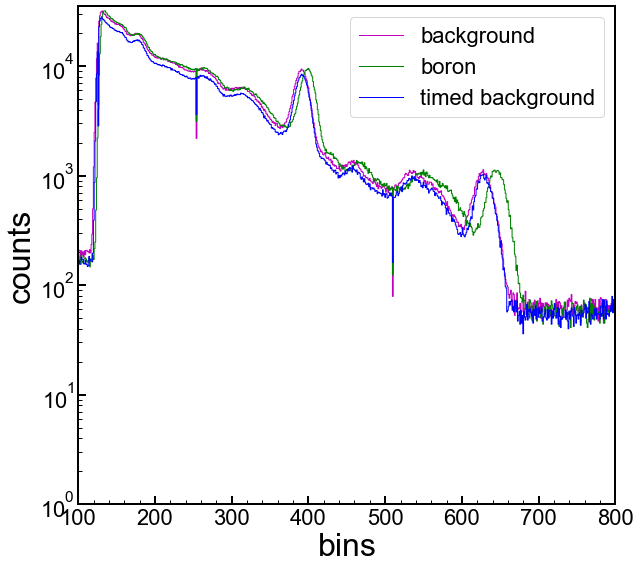

In [6]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

blue = '#118DFA'
xmin=100
xmax=800
stepsize=100
#ax1.xaxis.set_ticks(np.arange(xmin, xmax, stepsize))
#ax1.step(bknd_bins,bknd_cnts, where='mid',color='m', linestyle='-', \
#            label='background', linewidth=2)
ax1.step(bknd_bins,bknd_cnts,color='m',where='mid', linestyle='-',label='background', linewidth=1)
ax1.step(boron_bins,boron_cnts,color='g',where='mid', linestyle='-',label='boron', linewidth=1)
ax1.step(tbknd_bins,tbknd_cnts,color='blue',where='mid', linestyle='-',label='timed background', linewidth=1)


ymin = 1.0
ymax = 35000.0


#ax1.fill_between(bknd_bins,np.zeros(np.shape(bknd_bins)),bknd_cnts,step='mid',facecolor='m',alpha=0.4, \
#                 label='')



#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'bins')
ax1.set_ylabel('counts')
#ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()

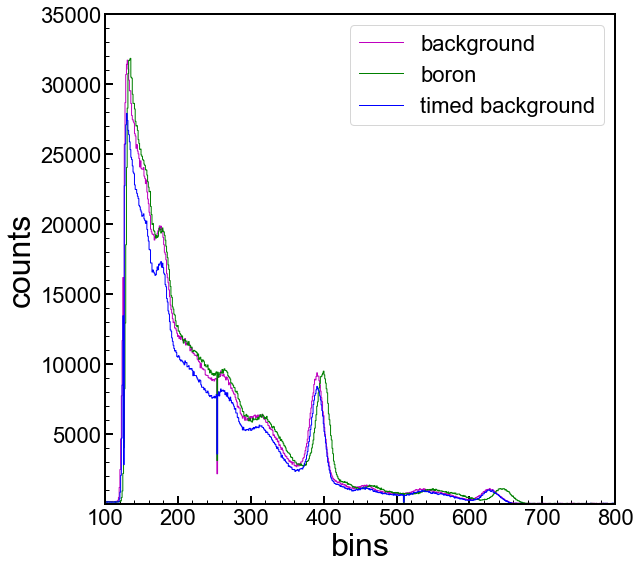

In [7]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

blue = '#118DFA'
xmin=100
xmax=800
stepsize=100
#ax1.xaxis.set_ticks(np.arange(xmin, xmax, stepsize))
#ax1.step(bknd_bins,bknd_cnts, where='mid',color='m', linestyle='-', \
#            label='background', linewidth=2)
ax1.step(bknd_bins,bknd_cnts,color='m',where='mid', linestyle='-',label='background', linewidth=1)
ax1.step(boron_bins,boron_cnts,color='g',where='mid', linestyle='-',label='boron', linewidth=1)
ax1.step(tbknd_bins,tbknd_cnts,color='blue',where='mid', linestyle='-',label='timed background', linewidth=1)


ymin = 1.0
ymax = 35000.0


#ax1.fill_between(bknd_bins,np.zeros(np.shape(bknd_bins)),bknd_cnts,step='mid',facecolor='m',alpha=0.4, \
#                 label='')



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'bins')
ax1.set_ylabel('counts')
#ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()

In [8]:
pip install lmfit

Note: you may need to restart the kernel to use updated packages.


In [9]:
import lmfit as lf
from scipy.interpolate import InterpolatedUnivariateSpline as interp

def gaussian(x,a,m,s):
    return a*np.exp(-(x-m)**2/(2*s**2))

gauss_mod = lf.Model(gaussian)
gauss_params = gauss_mod.make_params()
gauss_params.add('s',value=1,min=0)

fine = np.arange(min(bknd_bins),max(bknd_bins))

In [10]:

interpolated = interp(bknd_bins,bknd_cnts,k=5)
interpolatey = interpolated(fine)
#print(interpolatey[abs(fine - a) < 10])
#print(fine[abs(fine - a) < 10])

In [11]:
a=390
arange=15
gauss_params.add('m',value=a,vary=True)
gauss_params.add('a',value=interpolatey[fine==a][0],vary=True)
fita_bk = gauss_mod.fit(interpolatey[abs(fine - a) < arange],gauss_params,x=fine[abs(fine - a) < arange])
print(fita_bk.best_values)

b=625
brange=20
gauss_params.add('m',value=b,vary=True)
gauss_params.add('a',value=interpolatey[fine==b][0],vary=True)
fitb_bk = gauss_mod.fit(interpolatey[abs(fine - b) < brange],gauss_params,x=fine[abs(fine - b) < brange])
print(fitb_bk.best_values)

{'a': 9121.944208953124, 'm': 390.61258202529706, 's': 10.756712548780067}
{'a': 1048.2790452054053, 'm': 627.2325009458308, 's': 13.824277836497096}


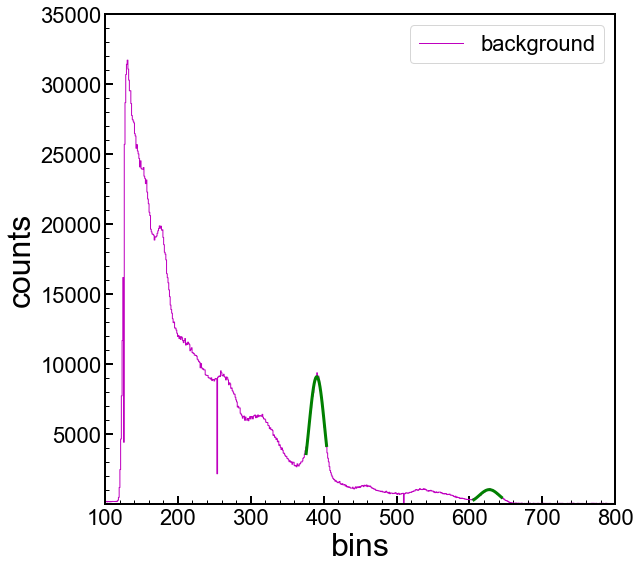

In [12]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

blue = '#118DFA'
xmin=100
xmax=800
stepsize=100
#ax1.xaxis.set_ticks(np.arange(xmin, xmax, stepsize))
#ax1.step(bknd_bins,bknd_cnts, where='mid',color='m', linestyle='-', \
#            label='background', linewidth=2)
ax1.step(bknd_bins,bknd_cnts,color='m',where='mid', linestyle='-',label='background', linewidth=1)
plt.plot(fine[abs(fine - a) < arange],fita_bk.best_fit,color='green',linewidth=3)
plt.plot(fine[abs(fine - b) < brange],fitb_bk.best_fit,color='green',linewidth=3)


ymin = 1.0
ymax = 35000.0


#ax1.fill_between(bknd_bins,np.zeros(np.shape(bknd_bins)),bknd_cnts,step='mid',facecolor='m',alpha=0.4, \
#                 label='')



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'bins')
ax1.set_ylabel('counts')
#ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()

In [13]:
interpolated = interp(boron_bins,boron_cnts,k=5)
interpolatey = interpolated(fine)

In [14]:
a=398
arange=15
gauss_params.add('m',value=a,vary=True)
gauss_params.add('a',value=interpolatey[fine==a][0],vary=True)
fita_b = gauss_mod.fit(interpolatey[abs(fine - a) < arange],gauss_params,x=fine[abs(fine - a) < arange])
print(fita_b.best_values)

b=645
brange=20
gauss_params.add('m',value=b,vary=True)
gauss_params.add('a',value=interpolatey[fine==b][0],vary=True)
fitb_b = gauss_mod.fit(interpolatey[abs(fine - b) < brange],gauss_params,x=fine[abs(fine - b) < brange])
print(fitb_b.best_values)

{'a': 9309.082759087232, 'm': 398.5973848314282, 's': 10.440320225100349}
{'a': 1119.8369116112524, 'm': 644.834272331318, 's': 12.636293384394925}


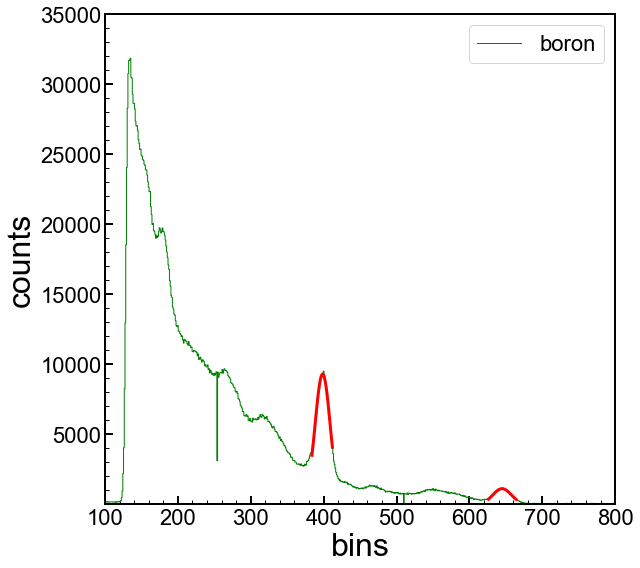

In [15]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

blue = '#118DFA'
xmin=100
xmax=800
stepsize=100
#ax1.xaxis.set_ticks(np.arange(xmin, xmax, stepsize))
#ax1.step(bknd_bins,bknd_cnts, where='mid',color='m', linestyle='-', \
#            label='background', linewidth=2)
ax1.step(boron_bins,boron_cnts,color='g',where='mid', linestyle='-',label='boron', linewidth=1)
plt.plot(fine[abs(fine - a) < arange],fita_b.best_fit,color='red',linewidth=3)
plt.plot(fine[abs(fine - b) < brange],fitb_b.best_fit,color='red',linewidth=3)


ymin = 1.0
ymax = 35000.0


#ax1.fill_between(bknd_bins,np.zeros(np.shape(bknd_bins)),bknd_cnts,step='mid',facecolor='m',alpha=0.4, \
#                 label='')



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'bins')
ax1.set_ylabel('counts')
#ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()

In [16]:
interpolated = interp(tbknd_bins,tbknd_cnts,k=5)
interpolatey = interpolated(fine)

In [17]:
a=390
arange=15
gauss_params.add('m',value=a,vary=True)
gauss_params.add('a',value=interpolatey[fine==a][0],vary=True)
fita_tbk = gauss_mod.fit(interpolatey[abs(fine - a) < arange],gauss_params,x=fine[abs(fine - a) < arange])
print(fita_tbk.best_values)

b=625
brange=20
gauss_params.add('m',value=b,vary=True)
gauss_params.add('a',value=interpolatey[fine==b][0],vary=True)
fitb_tbk = gauss_mod.fit(interpolatey[abs(fine - b) < brange],gauss_params,x=fine[abs(fine - b) < brange])
print(fitb_tbk.best_values)

{'a': 8169.932451339847, 'm': 391.38192722381365, 's': 10.507093673639245}
{'a': 973.9682770490319, 'm': 628.2561135623794, 's': 12.807948073082676}


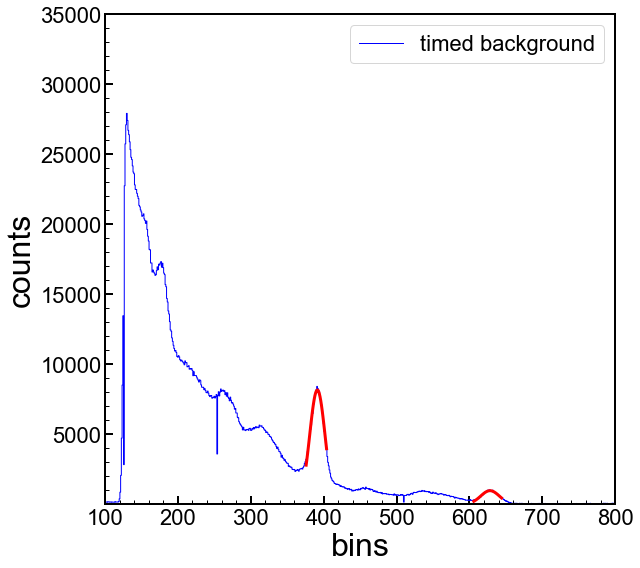

In [18]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

blue = '#118DFA'
xmin=100
xmax=800
stepsize=100
#ax1.xaxis.set_ticks(np.arange(xmin, xmax, stepsize))
#ax1.step(bknd_bins,bknd_cnts, where='mid',color='m', linestyle='-', \
#            label='background', linewidth=2)
ax1.step(tbknd_bins,tbknd_cnts,color='blue',where='mid', linestyle='-',label='timed background', linewidth=1)
plt.plot(fine[abs(fine - a) < arange],fita_tbk.best_fit,color='red',linewidth=3)
plt.plot(fine[abs(fine - b) < brange],fitb_tbk.best_fit,color='red',linewidth=3)


ymin = 1.0
ymax = 35000.0


#ax1.fill_between(bknd_bins,np.zeros(np.shape(bknd_bins)),bknd_cnts,step='mid',facecolor='m',alpha=0.4, \
#                 label='')



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'bins')
ax1.set_ylabel('counts')
#ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()

In [19]:
#calibration 40K-1.4608 MeV; 208Tl-2.6145 MeV
mbk = (2614.5-1460.8)/(fitb_bk.best_values['m']-fita_bk.best_values['m'])
bbk = 1460.8 - mbk*fita_bk.best_values['m'] 

mb = (2614.5-1460.8)/(fitb_b.best_values['m']-fita_b.best_values['m'])
bb = 1460.8 - mb*fita_b.best_values['m'] 

mtbk = (2614.5-1460.8)/(fitb_tbk.best_values['m']-fita_tbk.best_values['m'])
btbk = 1460.8 - mtbk*fita_tbk.best_values['m'] 

calbk = lambda b: mbk*b+bbk
calb = lambda b: mb*b+bb
caltbk = lambda b: mtbk*b+btbk

#print(fita_bk.best_values['m'])
print(mbk)
print(bbk)
print(calbk(bknd_bins))
print(bknd_bins)

4.8757518186263
-443.73000718815706
[-438.85425537 -433.97850355 -429.10275173 ... 4534.41259963 4539.28835145
 4544.16410327]
[1.000e+00 2.000e+00 3.000e+00 ... 1.021e+03 1.022e+03 1.023e+03]


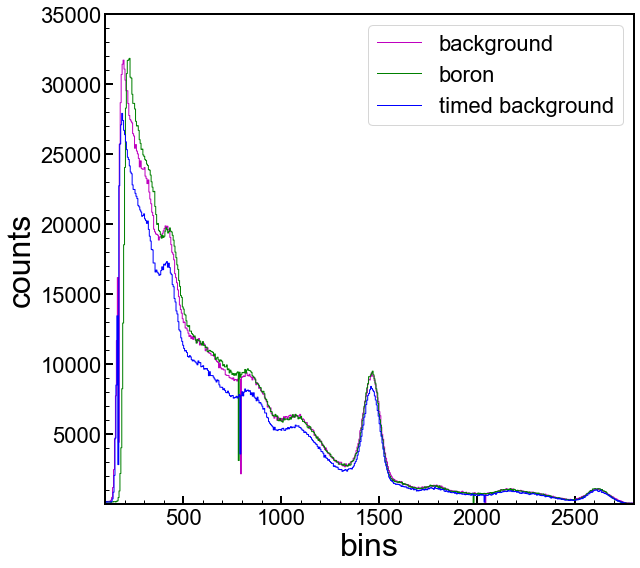

In [20]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

blue = '#118DFA'
xmin=100
xmax=2800.0
stepsize=100
#ax1.xaxis.set_ticks(np.arange(xmin, xmax, stepsize))
#ax1.step(bknd_bins,bknd_cnts, where='mid',color='m', linestyle='-', \
#            label='background', linewidth=2)
ax1.step(calbk(bknd_bins),bknd_cnts,color='m',where='mid', linestyle='-',label='background', linewidth=1)
ax1.step(calb(boron_bins),boron_cnts,color='g',where='mid', linestyle='-',label='boron', linewidth=1)
ax1.step(caltbk(tbknd_bins),tbknd_cnts,color='blue',where='mid', linestyle='-',label='timed background', linewidth=1)


ymin = 1.0
ymax = 35000.0


#ax1.fill_between(bknd_bins,np.zeros(np.shape(bknd_bins)),bknd_cnts,step='mid',facecolor='m',alpha=0.4, \
#                 label='')



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'bins')
ax1.set_ylabel('counts')
#ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()

In [113]:
#import sqrt
from math import sqrt
#subrtaction boron and tbknd
sbtr_tboron_cnts=(tbknd_cnts)-(boron_cnts)
print (sbtr_tboron_cnts)
tboron_sigma_bins = np.sqrt(((tbknd_bins)**2)+((boron_bins)**2))
print (tboron_sigma_bins)

[-21.  15. -20. ... -21. -19.   0.]
[1.41421356e+00 2.82842712e+00 4.24264069e+00 ... 1.44391205e+03
 1.44532626e+03 1.44674047e+03]


In [108]:
#import sqrt
from math import sqrt
#subrtaction bknd and boron
sbtr_boron_cnts=((boron_cnts)-(bknd_cnts))
print (sbtr_boron_cnts)
boron_sigma_bins = np.sqrt(((bknd_bins)**2)+((boron_bins)**2))
print (boron_sigma_bins)

[ 10. -46.  -5. ... -23.  25.   0.]
[1.41421356e+00 2.82842712e+00 4.24264069e+00 ... 1.44391205e+03
 1.44532626e+03 1.44674047e+03]


In [208]:
#plot for bknd/boron subtraction
import matplotlib.pyplot as plt
fig=plt.figure()

ax=fig.add_axes([sbtr_boron_cnts])
#ymin = 1.00
#ymax = 30000.00

#xmin = 100.00
#xmax = 1200.00

#create error bars
y=(sbtr_boron_cnts)
x=(bknd_bins)
y_error_bknd = (boron_sigma_bins)

y1=(sbtr_tboron_cnts)
x1=(tbknd_bins)
y_error_tbknd=(tboron_sigma_bins)

plt.figure(figsize=(9,10))
plt.xlabel('bins')
plt.ylabel('counts')
plt.ylim([1,15000])
#plt.plot([x,y], color='green')
#plt.plot([x1,y1], color='red')
plt.errorbar(x, y, yerr = y_error_bknd, fmt='o', color=blue, label='background')
plt.errorbar(x1, y1, yerr = y_error_tbknd, fmt='o', color=purple, label='timed')
plt.legend()
plt.show()

TypeError: from_bounds() missing 3 required positional arguments: 'y0', 'width', and 'height'

<Figure size 432x288 with 0 Axes>